In [13]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import numpy as np
import pandas as pd
from sklearn import datasets


# Load the dataset
diabetics = datasets.load_diabetes()
# print(diabetics)

cols_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data, columns=cols_name)
# print(df_diabetics)

# Load the diabetes dataset (data and target)
df_data = df_diabetics['bmi']
df_data = np.array(df_data)
df_data = df_data[:, np.newaxis]
# df_data = np.array(list([item] for item in df_diabetics['bmi']))

df_label = diabetics.target

In [14]:
from sklearn.model_selection import train_test_split

# Split dataset menjadi data train dan data test
data_train, data_test, target_train, target_test = train_test_split(df_data, df_label, test_size=0.1, random_state=1)

print(len(data_test))
print(len(data_train))

45
397


In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(data_train, target_train)

# Make predictions using the testing set
diabetes_target_pred = regr.predict(data_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(target_test, diabetes_target_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(target_test, diabetes_target_pred))



Coefficients: 
 [982.298116]
Mean squared error: 4860.28
Coefficient of determination: 0.00


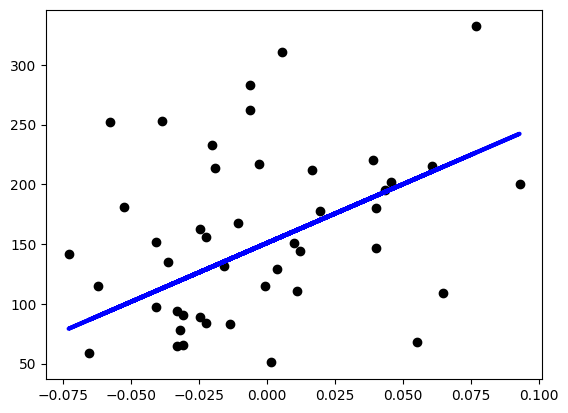

In [16]:
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(data_test, target_test, color="black")
plt.plot(data_test, diabetes_target_pred, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()